# PyTorch Computer vision

## 1.Computer vision libraries

* torchvision - base domain library
* torchvision.datasets
* torchvision.models - get pretrained models
* torchvision.transformers
* torch.utils.data.Dataset
* torch.utils.data.DataLoader



In [1]:
import torch
from torch import nn
#Torch Vison
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


##1.Getting a Dataset
>  MNIST


In [2]:
#Setup training data
train_data = datasets.MNIST(
    root = 'data',
    train =True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data =  datasets.MNIST(
    root = 'data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.01MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
print(f'Image shape={image.shape}, Labels ={label}')

Image shape=torch.Size([1, 28, 28]), Labels =5


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

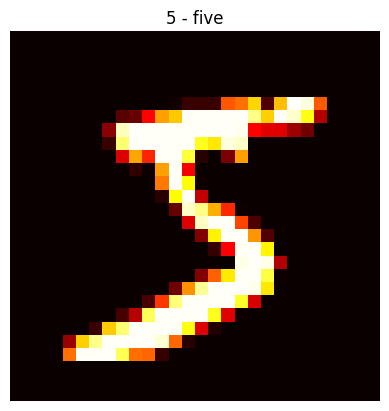

In [11]:
#Visualize
import matplotlib.pyplot as plt
image ,label = train_data[0]
plt.title(class_names[label])
plt.imshow(image.squeeze(), cmap='hot')
plt.axis(False)

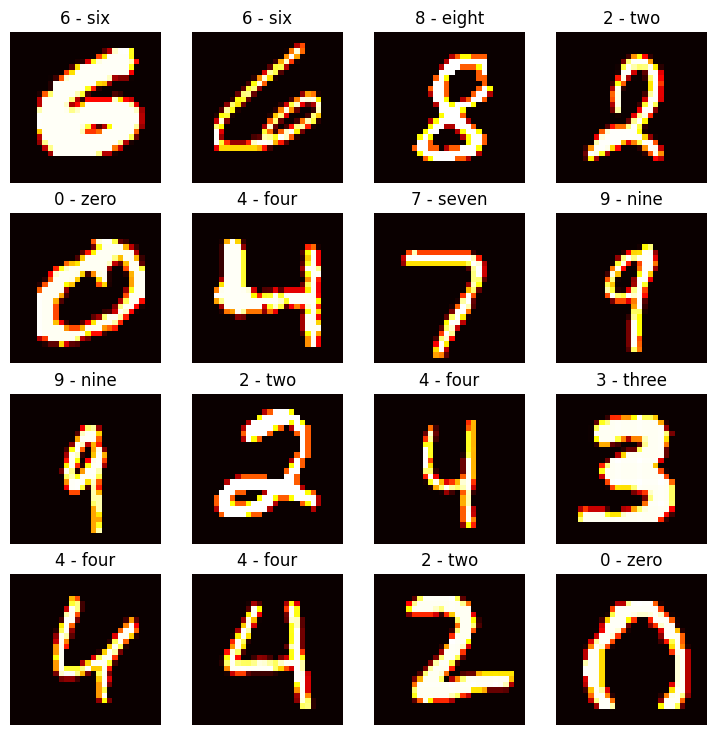

In [12]:
#Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols =4, 4
for i in range(1, rows*cols+1):
  rand = torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[rand]
  fig.add_subplot(rows,cols, i)
  plt.imshow(img.squeeze(), cmap='hot')
  plt.title(class_names[label])
  plt.axis(False)

# 2.Prepare Data Loader

In [13]:
train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [15]:
from torch.utils.data import DataLoader

#Set up batch size hyperparameter
batch = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch,
                            shuffle=True)

test_dataloader = DataLoader(dataset= test_data,
                             batch_size=batch,
                             shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e0caaba1210>,
 <torch.utils.data.dataloader.DataLoader at 0x7e0da5ead850>)

In [16]:
#Check what is creaked
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Lenght of train: {len(train_dataloader)} batches of {batch}')
print(f'Lenght of train: {len(test_dataloader)} batches of {batch}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e0caaba1210>, <torch.utils.data.dataloader.DataLoader object at 0x7e0da5ead850>)
Lenght of train: 1875 batches of 32
Lenght of train: 313 batches of 32


In [17]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
label: 9, label size: torch.Size([])


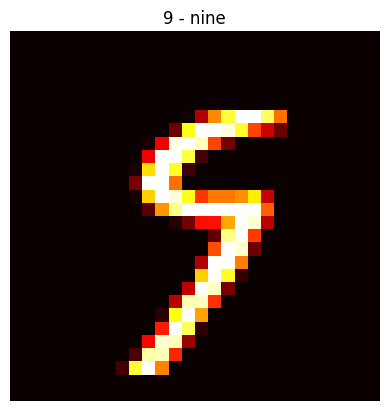

In [18]:
#Visualizing a single peice of a dataloader
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='hot')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'label: {label}, label size: {label.shape}')

#3.Model building

beginning from model 0

In [19]:
flatten_model = nn.Flatten()

x=train_features_batch[0]

output = flatten_model(x)
print(output.shape)

torch.Size([1, 784])


In [50]:
import torch
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        self.fc = nn.Sequential(
            nn.Linear(128 * 3 * 3, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x


In [53]:
next(model_0.parameters()).device


device(type='cuda', index=0)

In [51]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0()
model_0.to(device)
model_0


FashionMNISTModelV0(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mo

In [57]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)


tensor([[ 0.0156, -0.1717, -0.1181,  0.1326,  0.1069, -0.0156, -0.0713,  0.2862,
          0.0692,  0.0099]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [58]:
model_0.state_dict()

OrderedDict([('conv_block1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
       

In [59]:
import requests
from pathlib import Path
#Download helper functions
if Path('helper_functions.py').is_file():
  print('File already exists, skipping download')
else:
  print('Downloading file')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

File already exists, skipping download


In [60]:
from helper_functions import accuracy_fn

loss_fn =nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)


In [61]:
#Creating a function to time our experiments
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [62]:
start_time =timer()
end_time=timer()
print_train_time(start=start_time, end=end_time, device= 'cpu')

Train time on cpu: 0.000 seconds


2.9448000077536562e-05

In [64]:
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-----------')
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)  # <-- move to device

        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

    train_loss /= len(train_dataloader)

    # Evaluation
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
      for X, y in test_dataloader:
          X, y = X.to(device), y.to(device)
          test_pred = model_0(X)
          test_loss += loss_fn(test_pred, y).item()
          test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))



    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    print(f'Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.11040 | Test loss: 0.03679 | Test acc: 98.97
Epoch: 1
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.07953 | Test loss: 0.03626 | Test acc: 99.01
Epoch: 2
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.06905 | Test loss: 0.02652 | Test acc: 99.29
Epoch: 3
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.05631 | Test loss: 0.02292 | Test acc: 99.36
Epoch: 4
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/600

#4. Make predictions and get results

In [72]:
from tqdm import tqdm
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for x, y in tqdm(data_loader):
            x, y = x.to(device), y.to(device)  # <-- move to device
            y_pred = model(x)
            loss += loss_fn(y_pred, y).item()
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
    'Model Name': model.__class__.__name__,
    'Model Loss': loss,
    'Model Accuracy': acc
}



model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:01<00:00, 235.84it/s]


{'Model Name': 'FashionMNISTModelV0',
 'Model Loss': 0.018645409659481235,
 'Model Accuracy': 99.52076677316293}

In [77]:
!pip install Pillow
from PIL import ImageOps

Predicted Class: 1
Class Name: 1 - one


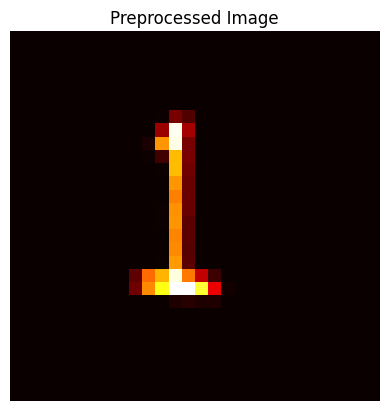

In [82]:
import torch
from PIL import Image, ImageOps
from torchvision import transforms
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_0.to(device)

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

def predict_image(image_path):
    image = Image.open(image_path).convert('L')
    image = ImageOps.invert(image)
    image = transform(image).unsqueeze(0).to(device)
    model_0.eval()
    with torch.no_grad():
        output = model_0(image)
        _, predicted_class = torch.max(output, 1)
    return predicted_class.item()

image_path = '/content/1.jpg'
predicted_class = predict_image(image_path)
print(f'Predicted Class: {predicted_class}')
print(f'Class Name: {class_names[predicted_class]}')

def show_tensor_image(tensor_img):
    img = tensor_img.squeeze().cpu().numpy()
    plt.imshow(img, cmap='hot')
    plt.axis('off')
    plt.title("Preprocessed Image")
    plt.show()

image_tensor = transform(ImageOps.invert(Image.open(image_path).convert('L')))
show_tensor_image(image_tensor)
